In [1]:
pwd

'C:\\Users\\user\\OneDrive\\Desktop\\scatter-plotter'

In [2]:
cd C:\\Users\\user\\OneDrive\\Desktop\\CSV files

C:\Users\user\OneDrive\Desktop\CSV files


In [3]:
pwd

'C:\\Users\\user\\OneDrive\\Desktop\\CSV files'

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
len(data)

891

In [7]:
data.head()
# '''listing some abbrevations
# survived = 1 and died = 0,sibSp = siblings or spouse in titanic,Parch = parents with children, S=SOUTHAMPTON,Q=QUEENSTOWN,C = CHERBOURG'''

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [9]:
data['Age'].min(),data['Age'].max()

(0.42, 80.0)

In [10]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## percentage of survived 

In [11]:
data['Survived'].value_counts() *100/len(data)

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [12]:
data['Sex'].value_counts() *100/len(data)

male      64.758698
female    35.241302
Name: Sex, dtype: float64

In [13]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

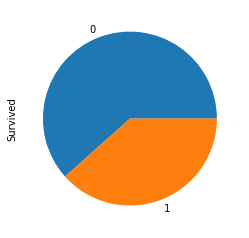

In [14]:
%matplotlib inline
alpha_color = 0.5
data['Survived'].value_counts().plot(kind = 'pie')

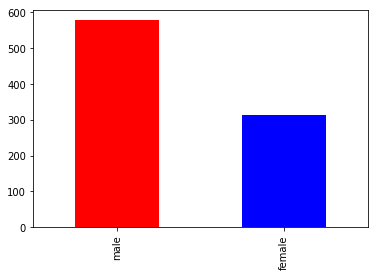

In [15]:
data['Sex'].value_counts().plot(kind= 'bar',color = ['Red','blue'])

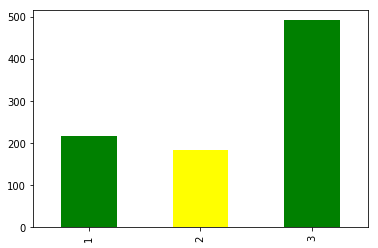

In [16]:
data['Pclass'].value_counts().sort_index().plot(kind = 'bar', color = ['green','yellow'])

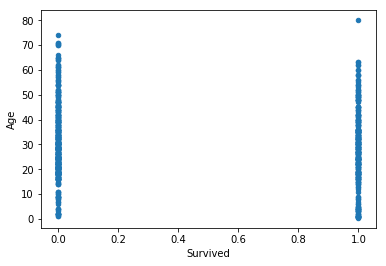

In [17]:
data.plot(kind = 'Scatter' , x = 'Survived', y = 'Age')

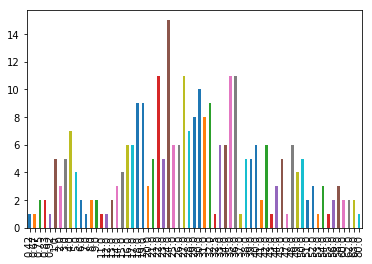

In [18]:
data[data['Survived'] ==1]['Age'].value_counts().sort_index().plot(kind = 'Bar')

## Rearranging the Data

In [19]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
data['Agebin'] = pd.cut(data['Age'], bins)

## Survived passenger visualization data

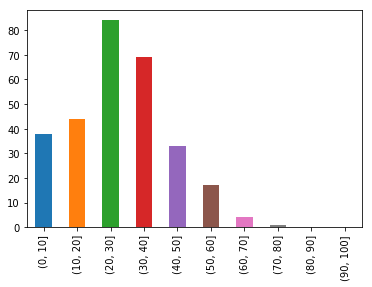

In [20]:
data[data['Survived'] ==1]['Agebin'].value_counts().sort_index().plot(kind = 'Bar')

## Passengers who died

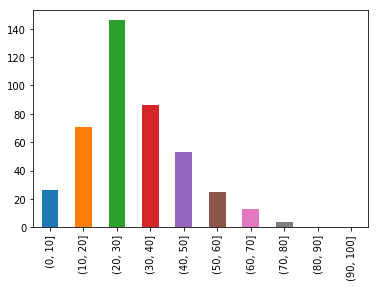

In [21]:
data[data['Survived'] ==0]['Agebin'].value_counts().sort_index().plot(kind = 'Bar')

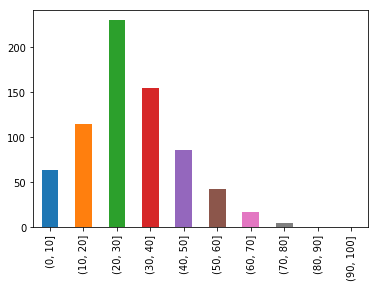

In [22]:
data ['Agebin'].value_counts().sort_index().plot(kind = 'Bar')

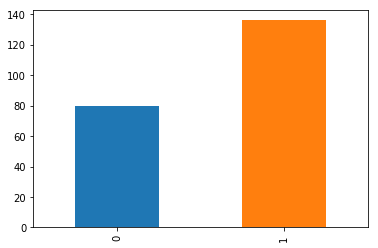

In [23]:
data[data['Pclass'] ==1]['Survived'].value_counts().sort_index().plot(kind = 'Bar')

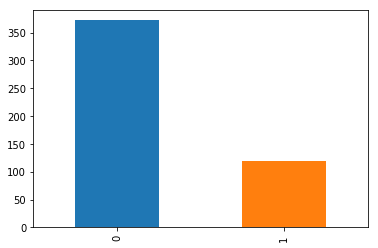

In [24]:
data[data['Pclass'] ==3]['Survived'].value_counts().sort_index().plot(kind = 'Bar')

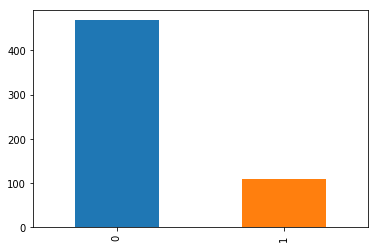

In [25]:
data[data['Sex'] =='male']['Survived'].value_counts().sort_index().plot(kind = 'Bar')

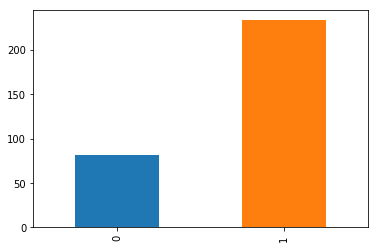

In [26]:
data[data['Sex'] =='female']['Survived'].value_counts().sort_index().plot(kind = 'Bar')

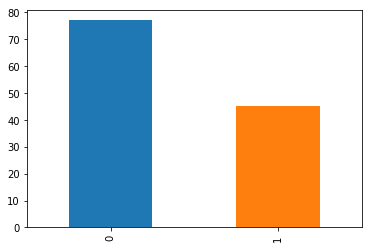

In [27]:
'''surviving chances of male in first passenger class is quite low'''
data[(data['Sex'] == 'male') & (data['Pclass'] == 1)]['Survived'].value_counts().plot(kind = 'bar')

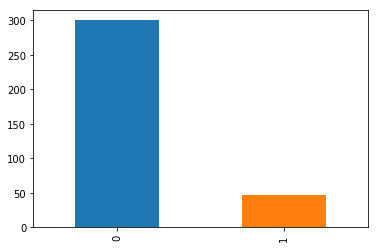

In [28]:
''' death magnitude is high in male in 3rd passenger class '''
data[(data['Sex'] == 'male') & (data['Pclass'] == 3)]['Survived'].value_counts().plot(kind = 'bar')

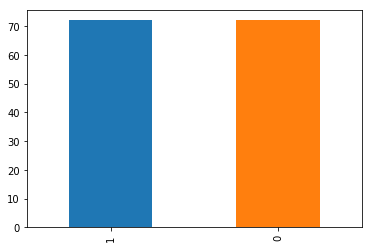

In [29]:
'''chances of surviving of female is equally distributed in 3rd passenger class '''
data[(data['Sex'] == 'female') & (data['Pclass'] == 3)]['Survived'].value_counts().plot(kind = 'bar')

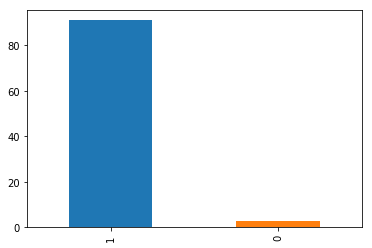

In [30]:
'''surviving percentage of female is more in first class'''
data[(data['Sex'] == 'female') & (data['Pclass'] == 1)]['Survived'].value_counts().plot(kind = 'bar')

## predicting the chance of survived passengers using sklearn

In [31]:
# survived be our target column
columns_target=['Survived']
columns_train=['Age','Pclass','Sex','Fare']
# taking columns and separating the data
x = data[columns_train]
y = data[columns_target]

In [32]:
# no NaN value spotted
x['Sex'].isnull().sum()

0

In [33]:
x['Pclass'].isnull().sum()

0

In [34]:
x['Fare'].isnull().sum()

0

In [35]:
# NaN values are spotted
x['Age'].isnull().sum()

177

In [36]:
# Age has NaN values so i am taking median of that by using fillna command 
x['Age']=x['Age'].fillna(x['Age'].median())
x['Age'].isnull().sum()

# in sklearn we cannot pass the string values so converting SEX column into string
# intializing the dictionary
d={'male':0,'female':1}
x['Sex']=x['Sex'].apply(lambda x :d[x])
x['Sex'].head()
                        

c:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\python\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [37]:
# final dataset
x.head()

,Age,Pclass,Sex,Fare
0,22.0,3,0,7.2500
1,38.0,1,1,71.2833
2,26.0,3,1,7.9250
3,35.0,1,1,53.1000
4,35.0,3,0,8.0500


In [38]:
# split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [39]:
from sklearn import svm
# declaring classifier
clf=svm.LinearSVC() 

# training model with the train data
# data sets are seprated by lines using linear support vector machine
clf.fit(x_train,y_train)
# printing the classifier details
print (clf)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


c:\python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [40]:
# making some predictions
print (clf.predict(x_test[0:1]))

[0]


In [41]:
# predicting for multiple values
print (clf.predict(x_test[0:20]))

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0]


In [42]:
# checking accracy of model
print (clf.score(x_test,y_test))

0.7491525423728813


In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

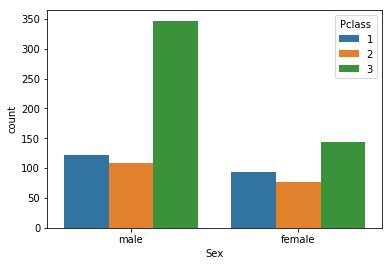

In [46]:
sns.countplot('Sex',data = data,hue = 'Pclass')

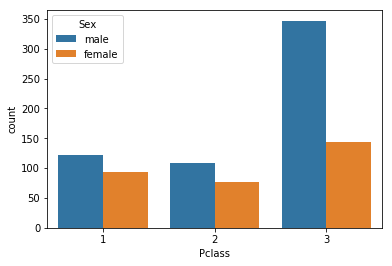

In [47]:
sns.countplot('Pclass',data = data,hue = 'Sex')

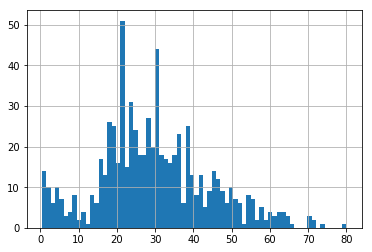

In [50]:
data['Age'].hist(bins=70)

In [52]:
data['Age'].mean()

29.69911764705882

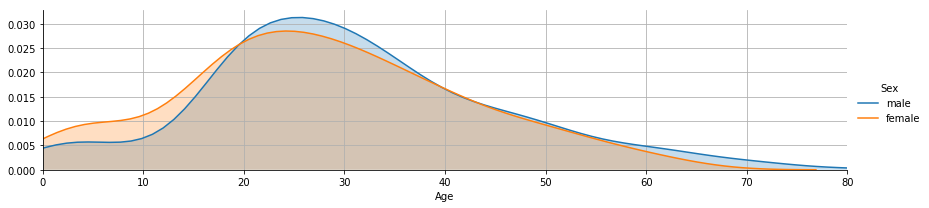

In [59]:
fig = sns.FacetGrid(data, hue="Sex",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = data['Age'].max()
fig.set(xlim=(0,oldest))
plt.grid(True)
fig.add_legend()

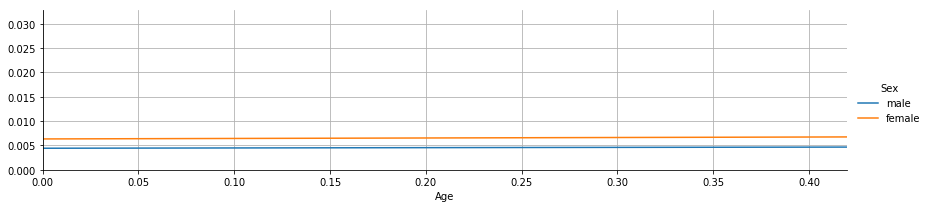

In [62]:
fig = sns.FacetGrid(data, hue="Sex",aspect=4)
fig.map(sns.kdeplot,'Age',shade= False)
oldest = data['Age'].min()
fig.set(xlim=(0,oldest))
plt.grid(True)
fig.add_legend()

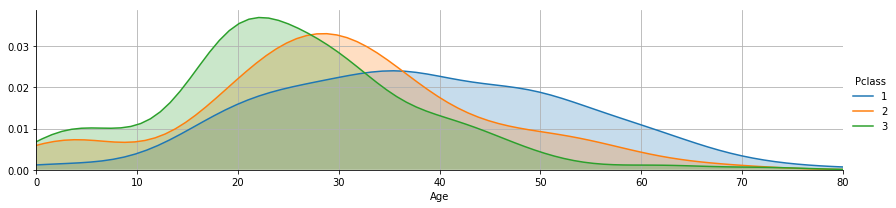

In [61]:
fig = sns.FacetGrid(data, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = data['Age'].max()
fig.set(xlim=(0,oldest))
plt.grid(True)
fig.add_legend()